# Clustering wholesale customers data using K-Means
The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('../input/wholesale-customers-data-set/Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Exploratory Data Analysis (EDA)

In [3]:
data.profile_report()

## Data Preprocessing
Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [4]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data)

pd.DataFrame(scaled_df).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,-2.452584e-16,-5.737834e-16,-2.422305e-17,-1.589638e-17,-6.030530e-17,1.135455e-17,-1.917658e-17,-8.276208e-17
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-7.787951e-01,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-5.783063e-01,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-2.942580e-01,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,1.890921e-01,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650e+00,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [5]:
model = KMeans(n_clusters=3,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

model.fit(scaled_df)
model.inertia_

2149.283956221759

## Find optimum value of K
Let's see how we can find optimum number of clusters. We will use elbow method.

Text(0, 0.5, 'Inertia or SSE')

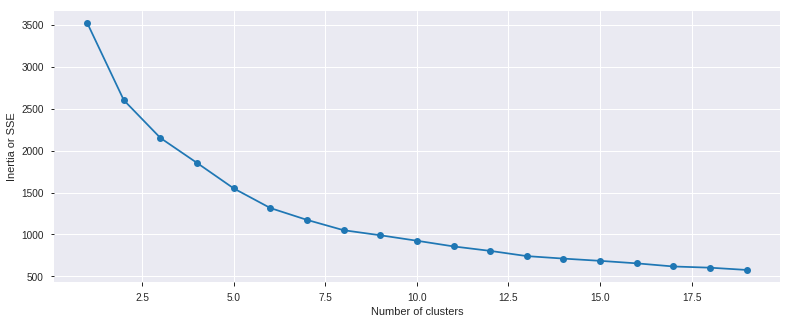

In [6]:
clusters = range(1, 20)
sse=[]
for cluster in clusters:
    model = KMeans(n_clusters=cluster,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=None,
               algorithm='auto')

    model.fit(scaled_df)
    sse.append(model.inertia_)

sse_df = pd.DataFrame(np.column_stack((clusters, sse)), columns=['cluster', 'SSE'])
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(sse_df['cluster'], sse_df['SSE'], marker='o')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia or SSE')

## Build the final model
We will choose K=5 and fit the model.

In [7]:
model = KMeans(n_clusters=5,
               init='k-means++',
               n_init=10,
               max_iter=300,
               tol=0.0001,
               precompute_distances='auto',
               verbose=0,
               random_state=42,
               copy_x=True,
               n_jobs=-1,
               algorithm='auto')

model.fit(scaled_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [8]:
print('SSE: ', model.inertia_)
print('\nCentroids: \n', model.cluster_centers_)

pred = model.predict(scaled_df)
data['cluster'] = pred
print('\nCount in each cluster: \n', data['cluster'].value_counts())

SSE:  1561.7110390879316

Centroids: 
 [[-5.74049873e-01 -1.58776439e+00  3.22040971e-02 -3.24809935e-01
  -3.91593636e-01  2.08356115e-01 -4.23471344e-01 -1.15896320e-01]
 [ 1.44865163e+00  1.66562579e-01 -3.26341681e-01  4.22850268e-01
   6.59619766e-01 -3.57310160e-01  6.86224579e-01  4.36563167e-03]
 [ 1.27040590e+00  5.19161179e-02  1.01697969e+00  3.88384518e+00
   3.77602602e+00  2.67775570e-01  3.91009990e+00  1.07099298e+00]
 [-6.80111616e-01  5.90668285e-01  1.12663617e-01 -3.55978165e-01
  -4.42978026e-01  7.32433363e-02 -4.43738312e-01 -9.14933607e-02]
 [-6.90297086e-01  5.90668285e-01  1.96681731e+00  5.17550306e+00
   1.28721685e+00  6.90059988e+00 -5.54861977e-01  1.64784475e+01]]

Count in each cluster: 
 3    210
1    125
0     92
2     12
4      1
Name: cluster, dtype: int64


We can see that 4th cluster has maximum number of samples, while 5th cluster has minimum number of samples.

#### References
* https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/